In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

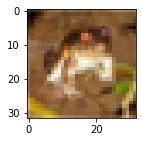

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

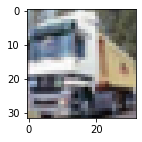

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

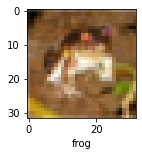

In [9]:
plot_sample(X_train, y_train, 0)

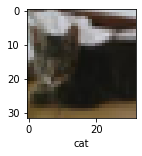

In [10]:
plot_sample(X_train, y_train, 9)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8148 - accuracy: 0.3511
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6262 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5438 - accuracy: 0.4529
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4828 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4331 - accuracy: 0.4947


In [13]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4679 - accuracy: 0.4726


[1.4679275751113892, 0.4726000130176544]

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_preds = ann.predict(X_test)
y_preds_classes = [np.argmax(element) for element in y_preds]
print(classification_report(y_test, y_preds_classes))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55      1000
           1       0.72      0.41      0.52      1000
           2       0.47      0.14      0.21      1000
           3       0.33      0.34      0.33      1000
           4       0.51      0.30      0.38      1000
           5       0.32      0.44      0.37      1000
           6       0.42      0.69      0.53      1000
           7       0.51      0.58      0.54      1000
           8       0.55      0.68      0.61      1000
           9       0.49      0.66      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [15]:
cnn = models.Sequential([
    # CNN
    layers.Convolution2D(filters=32, activation="relu", input_shape = (32,32,3), kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),

    layers.Convolution2D(filters=32, activation="relu", kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),


    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])


cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])


cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 1.5114 - accuracy: 0.4576
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1562 - accuracy: 0.5913
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0288 - accuracy: 0.6393
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9571 - accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9032 - accuracy: 0.6831
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8569 - accuracy: 0.7022
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8118 - accuracy: 0.7182
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7781 - accuracy: 0.7292
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7476 - accuracy: 0.7414
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.71

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9623 - accuracy: 0.6738


[0.9622591733932495, 0.673799991607666]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.51417460e-04, 4.55506059e-04, 1.78949535e-03, 9.00925159e-01,
        1.03367835e-04, 7.57351741e-02, 6.08472794e-04, 1.81014242e-04,
        1.98028386e-02, 4.76848727e-05],
       [9.35557634e-02, 5.17102964e-02, 1.34906959e-05, 2.51885263e-06,
        7.28174570e-08, 2.93436884e-08, 1.52345081e-07, 1.89190317e-07,
        8.54445457e-01, 2.72081612e-04],
       [5.79218268e-02, 1.16436511e-01, 3.86690325e-03, 1.00743892e-02,
        1.83094438e-04, 9.26952809e-04, 1.21865341e-04, 1.83775133e-04,
        8.02092731e-01, 8.19198973e-03],
       [7.31936157e-01, 1.07022174e-01, 4.70471196e-03, 1.89972192e-03,
        1.20537204e-03, 4.44068883e-06, 1.90259569e-04, 1.93384607e-04,
        1.50954589e-01, 1.88924209e-03],
       [6.86414423e-05, 3.13627788e-05, 4.77786083e-03, 8.56714994e-02,
        6.69652298e-02, 5.11557981e-03, 8.37039053e-01, 4.57256465e-06,
        3.11841315e-04, 1.43494535e-05]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [19]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [27]:
y_test[3]

array([0], dtype=uint8)

In [31]:
y_test = y_test.reshape(-1,)

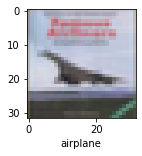

In [32]:
plot_sample(X_test, y_test, 3)

In [33]:
classes[y_classes[3]]

'airplane'

In [34]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.73      0.84      0.78      1000
           2       0.52      0.62      0.56      1000
           3       0.47      0.57      0.51      1000
           4       0.75      0.47      0.57      1000
           5       0.63      0.50      0.56      1000
           6       0.72      0.79      0.76      1000
           7       0.74      0.73      0.74      1000
           8       0.80      0.79      0.79      1000
           9       0.80      0.69      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



## Exercise

Use CNN to do handwritten digits classification using MNIST dataset.